In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import r_regression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# load utilities

%run ./utility/utilities.py

In [3]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.12.2
ipykernel        : 6.29.5
ipywidgets       : 8.1.3
jupyter_client   : 8.6.2
jupyter_core     : 5.7.2
jupyter_server   : 2.7.0
jupyterlab       : 4.2.3
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.2.1
qtconsole        : 5.5.2
traitlets        : 5.14.3


## loading de-identified data (16 features)

In [4]:
# (B001 - B131) 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_excel('data/BladderCancer_132P_TIL_prd1.xlsx')
data = data.loc[0:130]

Ndata = data[['ID','Surgeon','Age_at_Surgery','Race','Surgery','Smoker','BMI',\
              'NAC','cT','pT','cT_or_pT','pN','Bx_Histology','Histology',\
              'Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','Number_of_fragments_plated_tumor',\
              'Overall_TIL_growth']].copy()

Ndata = Ndata.replace(to_replace="Yes",value="Yes TIL")
Ndata = Ndata.replace(to_replace="No",value="No TIL")

Ndata = Ndata.replace(r'^\s*$', np.nan, regex=True) # Replace Blank values with DataFrame.replace() methods.

Extracted_col0 = Ndata.iloc[:,0:1]  # "ID"
Extracted_col1 = Ndata['Surgeon'];                           Extracted_col2 = Ndata['Age_at_Surgery']
Extracted_col3 = Ndata['Race'];                              Extracted_col4 = Ndata['Surgery']
Extracted_col5 = Ndata['Smoker'];                            Extracted_col6 = Ndata['BMI']
Extracted_col7 = Ndata['NAC'];                               Extracted_col8 = Ndata['cT']
Extracted_col9 = Ndata['pT'];                                Extracted_col10 = Ndata['cT_or_pT']
Extracted_col11 = Ndata['pN'];                               Extracted_col12 = Ndata['Bx_Histology']
Extracted_col13 = Ndata['Histology'];                        Extracted_col14 = Ndata['Sample_weight_g_tumor']
Extracted_col15 = Ndata['Tumor_digest_count_primary_tumor']; Extracted_col16 = Ndata['Number_of_fragments_plated_tumor']
Extracted_col17 = Ndata['Overall_TIL_growth']

ndata_sel = Extracted_col0
ndata_sel = ndata_sel.join(Extracted_col1); ndata_sel = ndata_sel.join(Extracted_col2)
ndata_sel = ndata_sel.join(Extracted_col3); ndata_sel = ndata_sel.join(Extracted_col4)
ndata_sel = ndata_sel.join(Extracted_col5); ndata_sel = ndata_sel.join(Extracted_col6)
ndata_sel = ndata_sel.join(Extracted_col7); ndata_sel = ndata_sel.join(Extracted_col8)
ndata_sel = ndata_sel.join(Extracted_col9); ndata_sel = ndata_sel.join(Extracted_col10)
ndata_sel = ndata_sel.join(Extracted_col11); ndata_sel = ndata_sel.join(Extracted_col12)
ndata_sel = ndata_sel.join(Extracted_col13); ndata_sel = ndata_sel.join(Extracted_col14)
ndata_sel = ndata_sel.join(Extracted_col15); ndata_sel = ndata_sel.join(Extracted_col16)
ndata_sel = ndata_sel.join(Extracted_col17)

ndata_sel = ndata_sel.rename(columns={'Overall_TIL_growth': 'OverallTILGrowth'})

Cols = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)',\
        'OverallTILGrowth']

feats = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)']

feat_labels = feats

In [5]:
# print(ndata_sel)
print(ndata_sel.shape)

(131, 18)


In [6]:
# Filter all rows which has NaN 

ndata_sel.dropna(inplace=True) # drop rows with Nan, no entries
# ndata_filt = ndata_sel[ndata_sel['OverallTILGrowth'].notna()]


ndata_filt = ndata_sel
print(ndata_filt.shape)

(60, 18)


## creating the External dataset

In [7]:
ndata_filt = ndata_filt.replace(to_replace='Yes TIL',value='1')
ndata_filt = ndata_filt.replace(to_replace='No TIL',value='-1')

# convert column "OverallTILGrowth" of Ndata to numerics
ndata_filt["OverallTILGrowth"] = pd.to_numeric(ndata_filt["OverallTILGrowth"])

X_16F = ndata_filt.iloc[:,:-1]
y_16F = ndata_filt.iloc[:, -1] #.values

XX, X_ExtVal, yy, y_ExtVal = train_test_split(X_16F, y_16F, test_size = 0.33, \
                                                        random_state=1234,stratify=y_16F)

In [8]:
print(y_ExtVal)
print(X_ExtVal.iloc[:,0].tolist())

34     1
22    -1
88     1
101    1
90     1
92     1
1      1
7      1
3      1
14    -1
19     1
13     1
98     1
82     1
11    -1
27     1
20    -1
51     1
53     1
26     1
Name: OverallTILGrowth, dtype: int64
['B035', 'B023', 'B089', 'B102', 'B091', 'B093', 'B002', 'B008', 'B004', 'B015', 'B020', 'B014', 'B099', 'B083', 'B012', 'B028', 'B021', 'B052', 'B054', 'B027']


In [9]:
# 

n_X_ExtVal = X_ExtVal

# print(n_X_ExtVal)
n_X_ExtVal.head()

,ID,Surgeon,Age_at_Surgery,Race,Surgery,Smoker,BMI,NAC,cT,pT,cT_or_pT,pN,Bx_Histology,Histology,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor
34,B035,4.0,64.0,1.0,1.0,2.0,20.36,0.0,7.0,11.0,7.0,3.0,1.0,1.0,1.38,4250000.0,24.0
22,B023,4.0,62.0,1.0,1.0,1.0,24.91,1.0,4.0,11.0,4.0,1.0,1.0,10.0,0.18,1170000.0,6.0
88,B089,4.0,60.0,1.0,1.0,1.0,26.37,1.0,10.0,9.0,10.0,0.0,4.0,4.0,1.12,1400000.0,24.0
101,B102,4.0,73.0,1.0,1.0,3.0,22.97,1.0,4.0,9.0,9.0,0.0,1.0,1.0,0.61,1650000.0,24.0
90,B091,1.0,76.0,1.0,1.0,3.0,26.57,0.0,6.0,8.0,8.0,2.0,11.0,7.0,0.49,1120000.0,18.0


## Training and Testing dataset (7 robust predictive features) 

In [10]:
# (B001 - B131) 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

# load data
data = pd.read_excel('data/BladderCancer_132P_TIL_prd1.xlsx')
data = data.loc[0:130]

Ndata = data[['ID','Surgeon','Age_at_Surgery','Race','Surgery','Smoker','BMI',\
              'NAC','cT','pT','cT_or_pT','pN','Bx_Histology','Histology',\
              'Sample_weight_g_tumor','Tumor_digest_count_primary_tumor','Number_of_fragments_plated_tumor',\
              'Overall_TIL_growth']].copy()

Ndata = Ndata.replace(to_replace="Yes",value="Yes TIL")
Ndata = Ndata.replace(to_replace="No",value="No TIL")

Ndata = Ndata.replace(r'^\s*$', np.nan, regex=True) # Replace Blank values with DataFrame.replace() methods.

Extracted_col0 = Ndata.iloc[:,0:1]  # "ID"
Extracted_col1 = Ndata['Surgeon']
Extracted_col2 = Ndata['Age_at_Surgery']
Extracted_col3 = Ndata['BMI']
Extracted_col4 = Ndata['cT_or_pT']
# Extracted_col5 = Ndata['Histology'] # may remove
Extracted_col6 = Ndata['Sample_weight_g_tumor']
Extracted_col7 = Ndata['Tumor_digest_count_primary_tumor']
Extracted_col8 = Ndata['Number_of_fragments_plated_tumor']
Extracted_col9 = Ndata['Overall_TIL_growth']

ndata_sel = Extracted_col0
ndata_sel = ndata_sel.join(Extracted_col1)
ndata_sel = ndata_sel.join(Extracted_col2)
ndata_sel = ndata_sel.join(Extracted_col3)
ndata_sel = ndata_sel.join(Extracted_col4)
# ndata_sel = ndata_sel.join(Extracted_col5) # may remove
ndata_sel = ndata_sel.join(Extracted_col6)
ndata_sel = ndata_sel.join(Extracted_col7)
ndata_sel = ndata_sel.join(Extracted_col8)
ndata_sel = ndata_sel.join(Extracted_col9)

ndata_sel = ndata_sel.rename(columns={'Overall_TIL_growth': 'OverallTILGrowth'})

Cols = ['Surgeon','Age at Surgery','BMI',\
        'cT or pT',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)',\
        'OverallTILGrowth']

feats = ['Surgeon','Age at Surgery','Race','Surgery','Smoker','BMI',\
        'NAC','cT','pT','cT or pT','pN','Bx Histology','Histology',\
        'Sample weight (g) tumor','Tumor digest count (primary tumor)','Number of fragments plated (tumor)']

feat_labels = feats

In [11]:
# Filter all rows for which has NaN (7 Robust & Predictive Features)

ndata_sel.dropna(inplace=True) # drop rows with Nan, no entries
# ndata_filt = ndata_sel[ndata_sel['OverallTILGrowth'].notna()]


ndata_filt = ndata_sel
print(ndata_filt.shape)

(102, 9)


In [13]:
# (7 Robust & Predictive Features)

NoTIL_pred2_idx0 = []
TIL_pred2_idx0 = []

for i in range(ndata_filt.shape[0]):
    if ndata_filt.iloc[i,-1]=='Yes TIL':
        TIL_pred2_idx0.append(ndata_filt.iloc[i,0])
        
for i in range(ndata_filt.shape[0]):
    if ndata_filt.iloc[i,-1]=='No TIL':
        NoTIL_pred2_idx0.append(ndata_filt.iloc[i,0])
        
print(TIL_pred2_idx0)
print(len(TIL_pred2_idx0))
print(' ')

print(NoTIL_pred2_idx0)
len(NoTIL_pred2_idx0)

['B002', 'B003', 'B004', 'B008', 'B013', 'B014', 'B017', 'B018', 'B019', 'B020', 'B024', 'B026', 'B027', 'B028', 'B029', 'B030', 'B032', 'B034', 'B035', 'B036', 'B037', 'B038', 'B039', 'B040', 'B041', 'B042', 'B046', 'B047', 'B050', 'B052', 'B053', 'B054', 'B056', 'B057', 'B062', 'B064', 'B067', 'B068', 'B070', 'B080', 'B083', 'B084', 'B086', 'B087', 'B088', 'B089', 'B090', 'B091', 'B093', 'B095', 'B097', 'B099', 'B100', 'B101', 'B102', 'B107', 'B112', 'B113', 'B115', 'B116', 'B120', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B131']
68
 
['B001', 'B009', 'B011', 'B012', 'B015', 'B021', 'B023', 'B044', 'B049', 'B059', 'B063', 'B065', 'B066', 'B074', 'B075', 'B078', 'B079', 'B081', 'B082', 'B092', 'B094', 'B096', 'B098', 'B104', 'B105', 'B106', 'B108', 'B109', 'B110', 'B114', 'B117', 'B118', 'B121', 'B128']


34

In [14]:
ndata_filt = ndata_filt.replace(to_replace='Yes TIL',value='1')
ndata_filt = ndata_filt.replace(to_replace='No TIL',value='-1')

# convert column "OverallTILGrowth" of Ndata to numerics
ndata_filt["OverallTILGrowth"] = pd.to_numeric(ndata_filt["OverallTILGrowth"])

ndata_filt.head()

,ID,Surgeon,Age_at_Surgery,BMI,cT_or_pT,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor,OverallTILGrowth
0,B001,4.0,68.0,21.05,4.0,1.66,60000000.0,24.0,-1
1,B002,4.0,57.0,33.76,4.0,0.46,5000000.0,12.0,1
2,B003,1.0,61.0,26.28,7.0,1.17,3500000.0,12.0,1
3,B004,1.0,91.0,19.22,4.0,0.71,1300000.0,12.0,1
7,B008,2.0,79.0,26.71,4.0,0.04,300000.0,5.0,1


In [15]:
print(ndata_filt.shape)

(102, 9)


## remove the Ext validation data from the dataset

In [16]:
def remove_ExtVal_from_df(df1,df2):
    values_to_remove = list(df1['ID'].values)
    n_set = len(values_to_remove)
    
    for i in range(n_set):
        tmp = df2[df2['ID'] == values_to_remove[i]].index
        df2.drop(tmp,inplace=True)

    return df2

In [17]:
# 

Xy_filt = remove_ExtVal_from_df(n_X_ExtVal,ndata_filt)

print(Xy_filt.shape)

(82, 9)


In [18]:
# (dataset minus Ext validation data, 7 Robust & Predictive Features)

NoTIL_pred3_idx0 = []
TIL_pred3_idx0 = []

for i in range(Xy_filt.shape[0]):
    if Xy_filt.iloc[i,-1]==1:
        TIL_pred3_idx0.append(Xy_filt.iloc[i,0])
        
for i in range(Xy_filt.shape[0]):
    if Xy_filt.iloc[i,-1]==-1:
        NoTIL_pred3_idx0.append(Xy_filt.iloc[i,0])
        
print(TIL_pred3_idx0)
print(len(TIL_pred3_idx0))
print(' ')

print(NoTIL_pred3_idx0)
len(NoTIL_pred3_idx0)

['B003', 'B013', 'B017', 'B018', 'B019', 'B024', 'B026', 'B029', 'B030', 'B032', 'B034', 'B036', 'B037', 'B038', 'B039', 'B040', 'B041', 'B042', 'B046', 'B047', 'B050', 'B053', 'B056', 'B057', 'B062', 'B064', 'B067', 'B068', 'B070', 'B080', 'B084', 'B086', 'B087', 'B088', 'B090', 'B095', 'B097', 'B100', 'B101', 'B107', 'B112', 'B113', 'B115', 'B116', 'B120', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B131']
52
 
['B001', 'B009', 'B011', 'B044', 'B049', 'B059', 'B063', 'B065', 'B066', 'B074', 'B075', 'B078', 'B079', 'B081', 'B082', 'B092', 'B094', 'B096', 'B098', 'B104', 'B105', 'B106', 'B108', 'B109', 'B110', 'B114', 'B117', 'B118', 'B121', 'B128']


30

In [19]:
# 

Xy_filt = Xy_filt.drop('ID', axis=1)
Xy_filt = Xy_filt.apply(pd.to_numeric) # convert all columns of Ndata to numerics

X = Xy_filt.iloc[:,:-1]
y = Xy_filt.iloc[:, -1] #.values

X.head()

,Surgeon,Age_at_Surgery,BMI,cT_or_pT,Sample_weight_g_tumor,Tumor_digest_count_primary_tumor,Number_of_fragments_plated_tumor
0,4.0,68.0,21.05,4.0,1.66,60000000.0,24.0
2,1.0,61.0,26.28,7.0,1.17,3500000.0,12.0
8,1.0,71.0,20.19,4.0,0.00,210000.0,12.0
10,4.0,73.0,33.95,4.0,0.00,2000000.0,10.0
12,4.0,68.0,21.32,7.0,0.34,465000.0,6.0


In [20]:
print(X.shape)

(82, 7)


In [21]:
print(y.shape)

(82,)


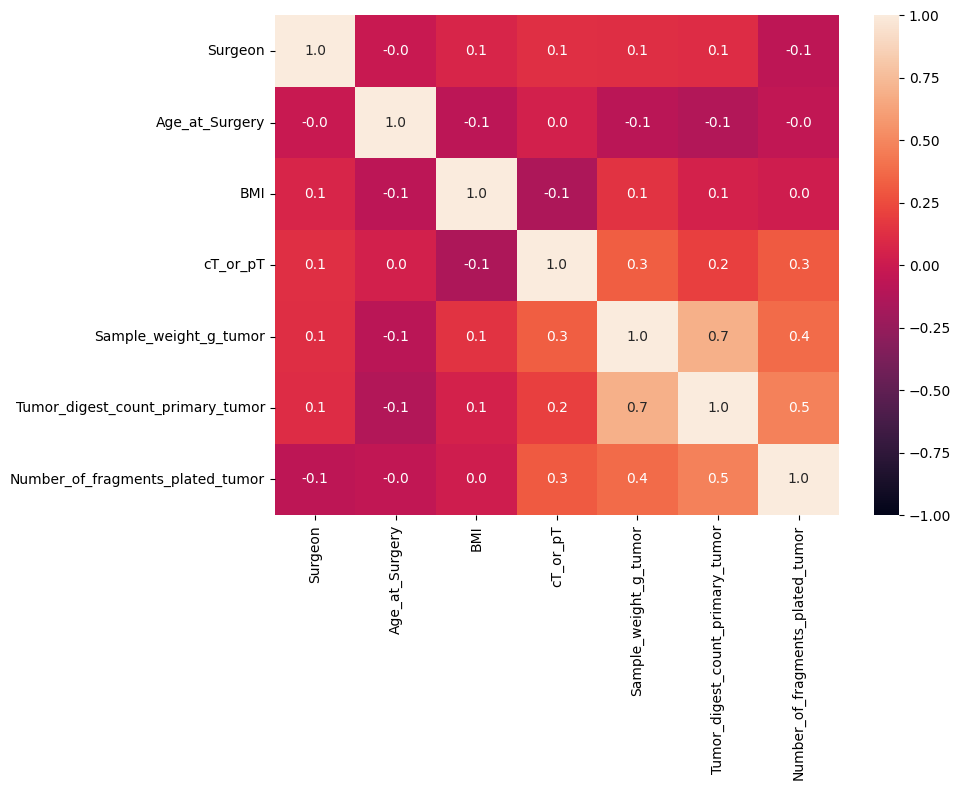

In [24]:
plt.figure(figsize=(10, 8))

# sns.heatmap(X.corr(), annot=True, fmt=".1f")
sns.heatmap(X.corr(), annot=True, fmt=".1f", vmin=-1.0, vmax=1.0)
# plt.title('Correlation between (7 Robust & Predictive) features')

plt.tight_layout()
savefig('./figs/corr_02')